# StatsModels & Scikit-Learn
#### Kirsten Mead

## StatsModels

In [152]:
#load required packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model, metrics, neighbors, model_selection
import matplotlib.pyplot as plt

In [153]:
#load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [154]:
#rename iris columns to eliminate spaces
iris_df.columns = ['s_length', 's_width', 'p_length', 'p_width']

Text(0, 0.5, 'Petal Length (cm)')

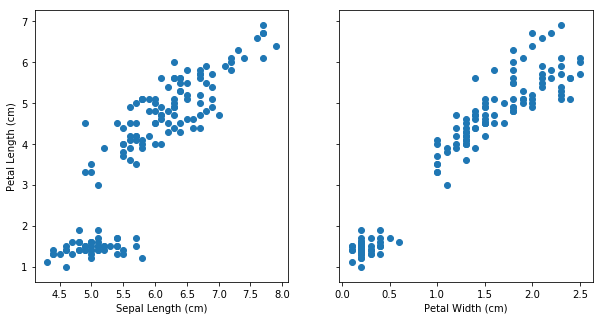

In [155]:
#plot the relationship between sepal length and petal length
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
ax[0].scatter(iris_df['s_length'], iris_df['p_length'])
ax[1].scatter(iris_df['p_width'], iris_df['p_length'])
ax[0].set_xlabel('Sepal Length (cm)')
ax[1].set_xlabel('Petal Width (cm)')
ax[0].set_ylabel('Petal Length (cm)')

### OLS Linear Regression

In [156]:
#fit ols regression model of petal length on sepal length and petal width
ols_length = smf.ols('p_length ~ s_length + p_width', data=iris_df).fit()

In [157]:
#view summary of ols regression
print(ols_length.summary())

                            OLS Regression Results                            
Dep. Variable:               p_length   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1354.
Date:                Mon, 11 Nov 2019   Prob (F-statistic):           2.01e-95
Time:                        23:15:57   Log-Likelihood:                -75.090
No. Observations:                 150   AIC:                             156.2
Df Residuals:                     147   BIC:                             165.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5071      0.337     -4.473      0.0

### Alternative syntax - NumPy arrays

In [158]:
#make numpy arrays from sepal and petal length
X = np.array(iris_df[['s_length', 'p_width']])
Y = np.array(iris_df['p_length'])
#add constant to X in order to have an intercept for the ols model
X = sm.add_constant(X)

In [159]:
#fit ols model using numpy arrays
ols_length_np = sm.OLS(Y, X).fit()

In [160]:
#view summary of ols regression
print(ols_length_np.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1354.
Date:                Mon, 11 Nov 2019   Prob (F-statistic):           2.01e-95
Time:                        23:15:57   Log-Likelihood:                -75.090
No. Observations:                 150   AIC:                             156.2
Df Residuals:                     147   BIC:                             165.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5071      0.337     -4.473      0.0

In [161]:
#just get the model parameters
ols_length_np.params

array([-1.50713838,  0.54225562,  1.74810286])

In [162]:
#Get predicted petal lengths from sepal length and petal width
ols_length_np.predict(X)

array([1.60798587, 1.49953474, 1.39108362, 1.33685806, 1.5537603 ,
       2.12028312, 1.51166834, 1.5537603 , 1.22840693, 1.32472446,
       1.77066255, 1.44530918, 1.27049889, 0.99937108, 1.9875648 ,
       2.28295981, 2.12028312, 1.78279615, 2.10814952, 1.78279615,
       1.77066255, 1.95760644, 1.33685806, 2.13241672, 1.44530918,
       1.5537603 , 1.90338088, 1.66221143, 1.66221143, 1.39108362,
       1.44530918, 2.12028312, 1.48740114, 1.82488811, 1.49953474,
       1.5537603 , 1.82488811, 1.32472446, 1.22840693, 1.60798587,
       1.72857059, 1.45744278, 1.22840693, 2.25300145, 1.95760644,
       1.62011947, 1.60798587, 1.33685806, 1.71643699, 1.5537603 ,
       4.73599498, 4.58545189, 4.8565797 , 3.74780126, 4.63967745,
       3.85625238, 4.70603661, 2.89801703, 4.34428244, 3.75993486,
       2.95224259, 4.31432408, 3.49449821, 4.24796492, 3.80202682,
       4.57331829, 4.15164739, 3.38604709, 4.47700076, 3.45240625,
       4.83875493, 4.07315463, 4.53122633, 3.89834434, 4.23583

### Logistic Regression

In [163]:
#get the true classes from the iris dataset
iris_outcome = iris.target

In [164]:
#get iris class names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [165]:
#0 Setosa, 1 Versicolor, 2 Virginica
iris_outcome

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [166]:
#change outputs to 0 for Setosa/Versicolor, 1 for Virginica
iris_bin_outcome = iris_outcome.copy()
iris_bin_outcome[iris_outcome==1] = 0
iris_bin_outcome[iris_outcome==2] = 1

In [167]:
#now we have a binomial classification problem
iris_bin_outcome

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [168]:
#use sepal length/width and petal length/width as input variables
iris_inputs = np.array(iris_df)
#add constant to array of inputs
iris_inputs = sm.add_constant(iris_inputs)

In [169]:
#add binary class to the iris dataframe
iris_df['bin_class']= iris_bin_outcome

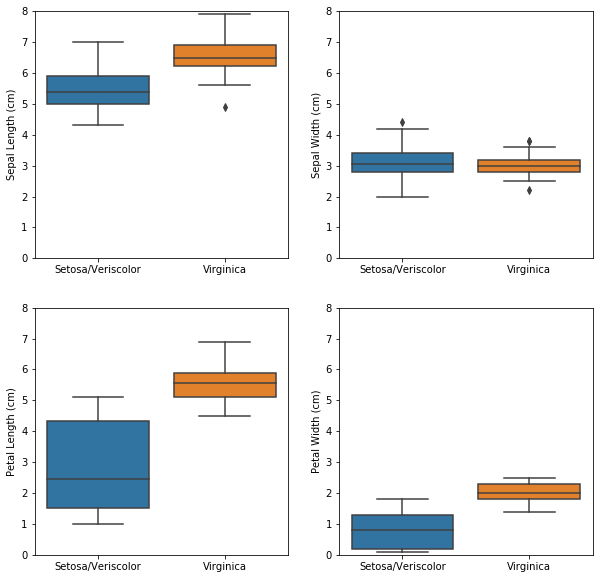

In [170]:
import seaborn as sns
#plots of sepal and petal lengths and widths by class
#create subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
#boxplots for each input variable and binary class
sns.boxplot(x='bin_class', y='s_length', data=iris_df, ax=ax[0,0])
sns.boxplot(x='bin_class' , y='s_width', data=iris_df, ax=ax[0,1])
sns.boxplot(x='bin_class', y='p_length',data=iris_df, ax=ax[1,0])
sns.boxplot(x='bin_class', y='p_width', data=iris_df, ax=ax[1,1])
for i in range(2):
    for j in range(2):
        ax[i, j].set_xticklabels(['Setosa/Veriscolor', 'Virginica'])
        ax[i, j].set_ylim(0,8)
        ax[i, j].set_xlabel(None)
ax[0,0].set_ylabel('Sepal Length (cm)')
ax[0,1].set_ylabel('Sepal Width (cm)')
ax[1,0].set_ylabel('Petal Length (cm)')
ax[1,1].set_ylabel('Petal Width (cm)')
plt.show()

In [171]:
#logistic regression of binary class on sepal and petal lengths/widths
logistic = sm.Logit(iris_bin_outcome, iris_inputs).fit()

Optimization terminated successfully.
         Current function value: 0.039662
         Iterations 14


## Try it yourself

View the summary of the model

Get the regression parameters

Get predictions from the logistic model using the same function as with the linear model

# Scikit-Learn

### Linear Regression

In [172]:
#sklearn linear model does not require you to add a constant column to the array of inputs
#remove the constant column from X
X_sk = X[:,1:]

In [173]:
#fit a linear model of petal length on sepal length and petal width using sklearn
sk_linear = linear_model.LinearRegression().fit(X_sk, Y)

In [174]:
#get coefficients of linear model
sk_linear.coef_

array([0.54225562, 1.74810286])

In [175]:
#get the intercept of the linear model
sk_linear.intercept_
#notice that the coefficients and intercept are the same as with StatsModels
#Both sklearn and StatsModels linear regression models minimize the sum of square residuals by default

-1.5071383768459286

In [176]:
#get predictions of petal length from input values
Y_pred_sk = sk_linear.predict(X_sk)
Y_pred_sk

array([1.60798587, 1.49953474, 1.39108362, 1.33685806, 1.5537603 ,
       2.12028312, 1.51166834, 1.5537603 , 1.22840693, 1.32472446,
       1.77066255, 1.44530918, 1.27049889, 0.99937108, 1.9875648 ,
       2.28295981, 2.12028312, 1.78279615, 2.10814952, 1.78279615,
       1.77066255, 1.95760644, 1.33685806, 2.13241672, 1.44530918,
       1.5537603 , 1.90338088, 1.66221143, 1.66221143, 1.39108362,
       1.44530918, 2.12028312, 1.48740114, 1.82488811, 1.49953474,
       1.5537603 , 1.82488811, 1.32472446, 1.22840693, 1.60798587,
       1.72857059, 1.45744278, 1.22840693, 2.25300145, 1.95760644,
       1.62011947, 1.60798587, 1.33685806, 1.71643699, 1.5537603 ,
       4.73599498, 4.58545189, 4.8565797 , 3.74780126, 4.63967745,
       3.85625238, 4.70603661, 2.89801703, 4.34428244, 3.75993486,
       2.95224259, 4.31432408, 3.49449821, 4.24796492, 3.80202682,
       4.57331829, 4.15164739, 3.38604709, 4.47700076, 3.45240625,
       4.83875493, 4.07315463, 4.53122633, 3.89834434, 4.23583

In [177]:
#Get the r-squared value for the linear regression model
sk_linear.score(X_sk, Y)

0.9485236349446816

In [178]:
#get the mean squared error from the sklearn linear regression
metrics.mean_squared_error(Y, Y_pred_sk)

0.15934522529904482

### Logistic Regression

In [179]:
#view the top of the iris dataframe again
iris_df.head()

,s_length,s_width,p_length,p_width,bin_class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [180]:
#get input variables from iris dataframe (the first 4 columns of the dataframe)
iris_inputs_sk = np.array(iris_df)[:, :4]
#outcomes are iris_bin_outcome
#create test and training sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(iris_inputs_sk, iris_bin_outcome, test_size=0.3, random_state=1)

In [181]:
#fit a logistic model to classify irises as 0 for Setosa/Versicolor, 1 for Virginica 
sk_logistic = linear_model.LogisticRegression(solver='liblinear').fit(X_train, y_train)
#default penalty is the l2 norm

In [182]:
#make class predictions using the logistic regression model on training data
#predicts class with highest probability (threshold of 0.5)
sk_logistic.predict(X_train)

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [183]:
#get the first 10 predicted probabilities from the logistic regression model on training data
#first column is probability of class 0, second is class 1
sk_logistic.predict_proba(X_train)[:10,]

array([[2.25152871e-02, 9.77484713e-01],
       [9.99935072e-01, 6.49275692e-05],
       [9.99894041e-01, 1.05958531e-04],
       [9.99676578e-01, 3.23421978e-04],
       [6.52362899e-01, 3.47637101e-01],
       [9.99864648e-01, 1.35352080e-04],
       [9.99959295e-01, 4.07051108e-05],
       [1.22031104e-01, 8.77968896e-01],
       [2.86871181e-01, 7.13128819e-01],
       [1.43115083e-01, 8.56884917e-01]])

## Try it yourself

Get the coefficients and intercept for the logistic model

### Classification evaluation

In [184]:
#probabilities for positive outcome (Virginica Iris) on training data
virginica_prob = sk_logistic.predict_proba(X_train)[:,1]
#get the false positive and true positive rates at different thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_train, virginica_prob, drop_intermediate=False)

In [185]:
#view thresholds
thresholds

array([1.97956868e+00, 9.79568682e-01, 9.77484713e-01, 9.40480220e-01,
       9.36242795e-01, 9.35753178e-01, 9.27197517e-01, 9.25181127e-01,
       9.23920793e-01, 9.22604694e-01, 9.16567421e-01, 9.09537052e-01,
       9.09165780e-01, 9.00743265e-01, 8.86545854e-01, 8.85951121e-01,
       8.81353615e-01, 8.77968896e-01, 8.63445210e-01, 8.56884917e-01,
       8.47037370e-01, 8.46075169e-01, 8.16130434e-01, 8.15703583e-01,
       8.00250813e-01, 7.92249884e-01, 7.88573461e-01, 7.80364535e-01,
       7.48811657e-01, 7.35906542e-01, 7.13128819e-01, 6.49113583e-01,
       6.48713382e-01, 6.38636033e-01, 6.36889165e-01, 6.31075791e-01,
       6.03576507e-01, 5.85387529e-01, 5.71656954e-01, 5.34048067e-01,
       4.28279611e-01, 3.89987762e-01, 3.63192379e-01, 3.47637101e-01,
       2.89631079e-01, 2.83757580e-01, 2.33712284e-01, 2.31014805e-01,
       2.28806954e-01, 2.07867623e-01, 2.05600876e-01, 1.95953594e-01,
       1.91900185e-01, 1.81442039e-01, 1.75921860e-01, 1.56283379e-01,
      

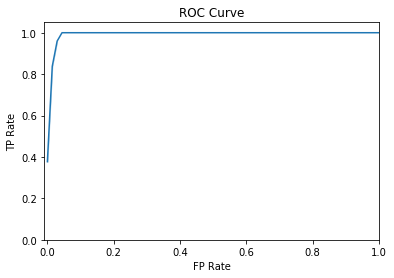

In [186]:
#Plot the ROC curve
roc = sns.lineplot(x=fpr, y=tpr, ci=False)
roc.set(xlabel='FP Rate', ylabel='TP Rate', title='ROC Curve', xlim=(-0.01,1),ylim=(0,1.05))
plt.show()

In [187]:
#Get the AUC score for training data
auc_train = metrics.roc_auc_score(y_train, virginica_prob)
#predicted probabilities on test data
test_prob = sk_logistic.predict_proba(X_test)[:,1]
#Get the AUC score for test data
auc_test = metrics.roc_auc_score(y_test, test_prob)
#print results
print("Training AUC: ", round(auc_train, 3))
print("Test AUC: ", round(auc_test, 3))

Training AUC:  0.995
Test AUC:  1.0


In [188]:
#calculate log loss on training data
print("Training log loss: ", round(metrics.log_loss(y_train, virginica_prob), 3))
#calculate log loss on test data
print("Test log loss: ", round(metrics.log_loss(y_test, test_prob), 3))

Training log loss:  0.161
Test log loss:  0.199


In [189]:
#predicted classes of training data based on threshold of 0.55
train_pred = np.zeros(len(y_train))
train_pred[sk_logistic.predict_proba(X_train)[:,1] >= 0.55] = 1
#confusion matrix on training data (using threshold of 0.55)
metrics.confusion_matrix(y_train, train_pred)
#confusion matrix output is:
# TN FP
# FN TP

array([[66,  2],
       [ 0, 37]])

In [190]:
#confusion matrix on test data
#predicted classes of test data based on threshold of 0.55
test_pred = np.zeros(len(y_test))
test_pred[sk_logistic.predict_proba(X_test)[:,1] >= 0.55] = 1
#confusion matrix on test data (using threshold of 0.55)
metrics.confusion_matrix(y_test, test_pred)

array([[31,  1],
       [ 0, 13]])

### K-Nearest Neighbors

In [191]:
#knn classifier on training data
#empty list for auc scores
scores = []
#try different values for the number of neighbors
for i in range(1,10):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    prob = knn.predict_proba(X_train)[:,1]
    auc = metrics.roc_auc_score(y_train, prob)
    scores.append(auc)

In [192]:
#look at auc scores
scores
#lower values of k (number of neighbors) will likely lead to overfitting

[1.0,
 0.9982114467408586,
 0.9960254372019077,
 0.996422893481717,
 0.9960254372019077,
 0.9960254372019077,
 0.9946343402225755,
 0.9958267090620032,
 0.9950317965023847]

In [193]:
#knn classifier with k = 4
knn = neighbors.KNeighborsClassifier(n_neighbors=4).fit(X_train, y_train)
#predict class on training data
knn_prob_train = knn.predict_proba(X_train)[:,1]

In [194]:
#auc score on training data for knn classifier with k=4
metrics.roc_auc_score(y_train, knn_prob_train)

0.996422893481717

In [195]:
#get predicted probabilities for test data
knn_prob_test = knn.predict_proba(X_test)[:,1]
#auc score on test data for knn classifier with k=4
metrics.roc_auc_score(y_test, knn_prob_test)

0.9975961538461539

## Try it yourself

Make a confusion matrix for the kNN classifier on the test data using a threshold of 0.5. How many true positives, false positives, true negatives, and false negatives are there?